# 1.Lgbm

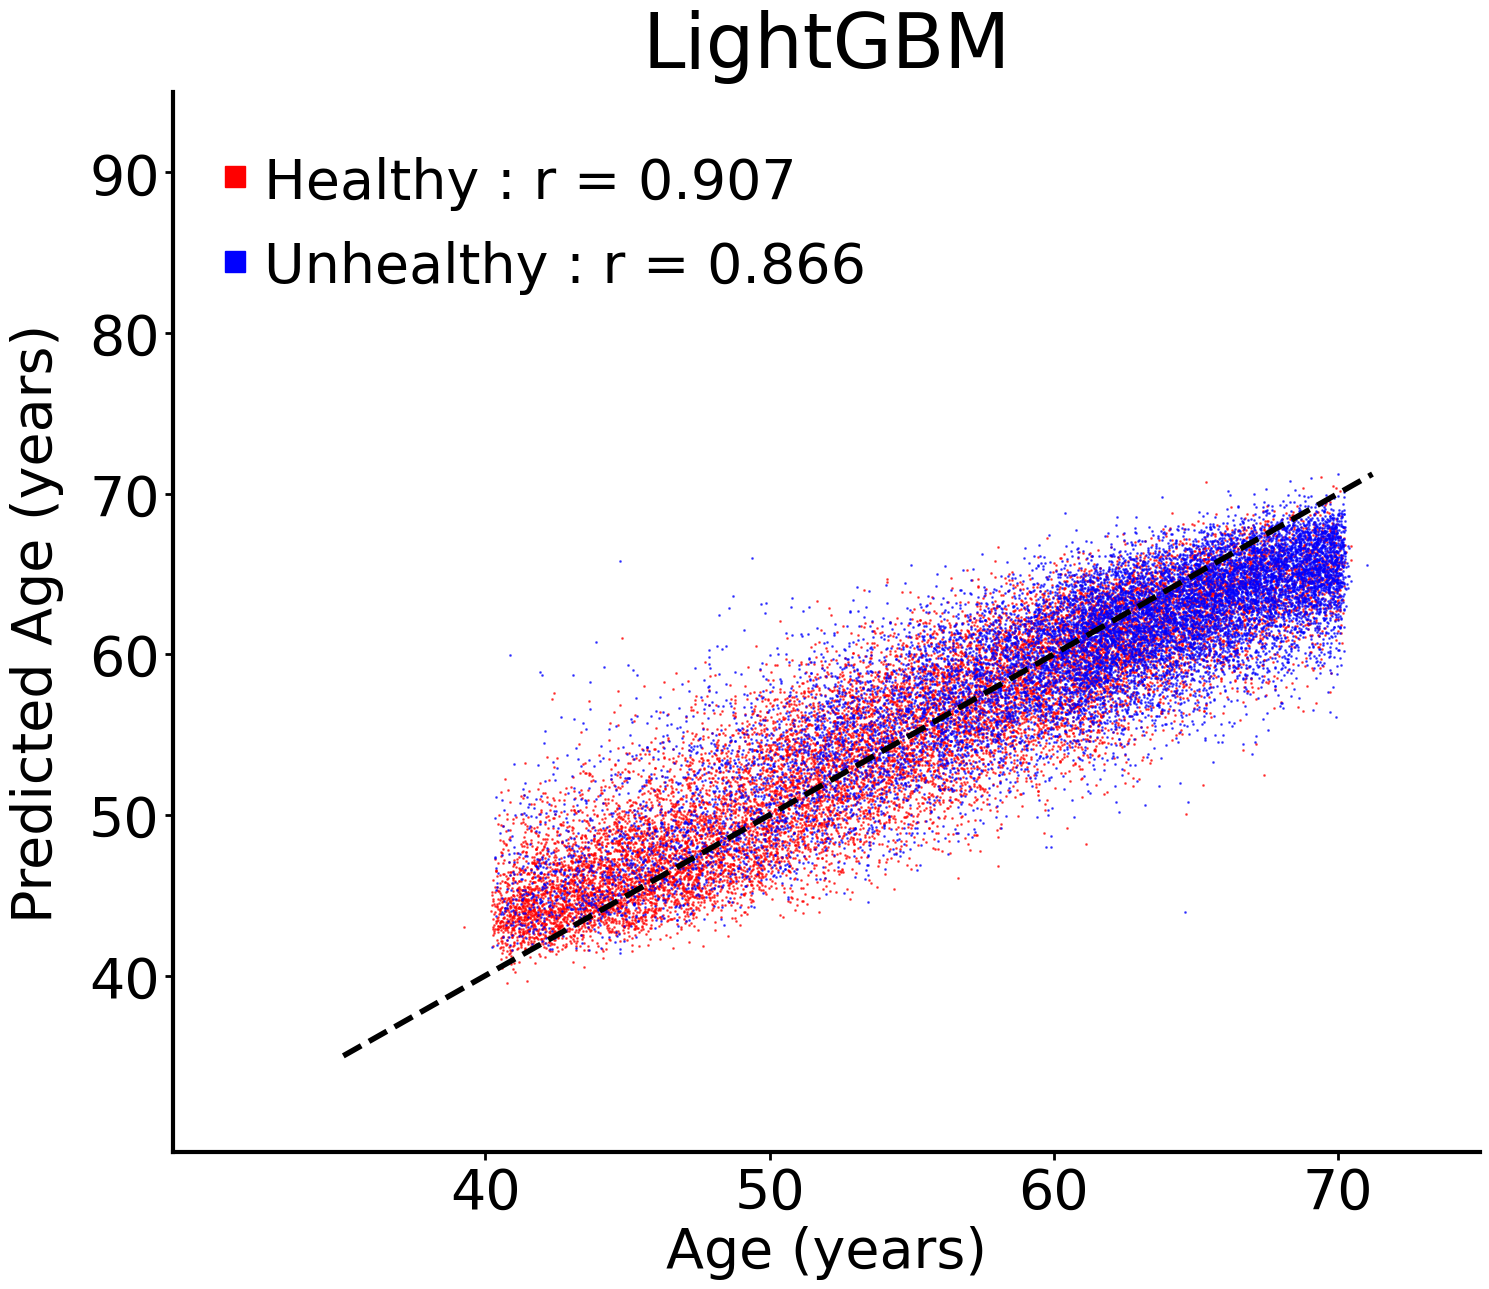

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Define paths to data files
merged_csv_path = '../data/Lgbm/3.AR+Age+PreAge.csv'
heal_path = '../data/Lgbm/1.heal_AR.csv'
unheal_path = '../data/Lgbm/2.unheal_AR.csv'

# Load datasets
df_all = pd.read_csv(merged_csv_path)
heal_df = pd.read_csv(heal_path)
unheal_df = pd.read_csv(unheal_path)

# Get sets of participant IDs for each group
heal_eids = set(heal_df['eid'])
unheal_eids = set(unheal_df['eid'])

# Add group classification column to main dataframe
df_all['group'] = df_all['eid'].apply(lambda x: 'heal' if x in heal_eids else 'unheal')

# Extract age data
actual_age = df_all['Age']
predicted_age = df_all['PreAge']

# Create figure with large dimensions
fig, ax = plt.subplots(figsize=(15, 13))

# Plot points with different colors for healthy vs unhealthy groups
for group, color, label in [('heal', 'red', 'Healthy'), ('unheal', 'blue', 'Unhealthy')]:
    subset = df_all[df_all['group'] == group]
    ax.scatter(subset['Age'], subset['PreAge'], 
               c=color,
               alpha=0.6,
               s=1,
               label=label)

# Add diagonal reference line (perfect prediction)
min_age = min(actual_age.min(), predicted_age.min())
max_age = max(actual_age.max(), predicted_age.max())
ax.plot([35, max_age], [35, max_age], 'k--', linewidth=4)

# Set axis limits and ticks
ax.set_xlim(29, 75)
ax.set_xticks(np.arange(40, 71, 10))
ax.set_ylim(29, 95)
ax.set_yticks(np.arange(40, 91, 10))

# Titles and Labels
ax.set_title('LightGBM', fontsize=55, pad=18)
ax.set_xlabel('Age (years)', fontsize=40)
ax.set_ylabel('Predicted Age (years)', fontsize=40, labelpad=18)

# Position parameters for legend elements
legend_x = 0.05
legend_y = 0.94
line_spacing = 0.08

# Healthy group legend item (red)
ax.add_patch(Rectangle((legend_x - 0.01, legend_y - 0.03), 0.015, 0.02, 
             transform=ax.transAxes, color='red', clip_on=False))
ax.text(legend_x + 0.02, legend_y, "Healthy : r = 0.907", 
        transform=ax.transAxes, fontsize=40, 
        verticalalignment='top', horizontalalignment='left')

# Unhealthy group legend item (blue)
ax.add_patch(Rectangle((legend_x -0.01, legend_y - 0.03 - line_spacing), 0.015, 0.02, 
             transform=ax.transAxes, color='blue', clip_on=False))
ax.text(legend_x + 0.02, legend_y - line_spacing, "Unhealthy : r = 0.866", 
        transform=ax.transAxes, fontsize=40, 
        verticalalignment='top', horizontalalignment='left')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize remaining spines (borders)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

# Customize tick marks
ax.tick_params(axis='x', width=2, length=6, labelsize=40)
ax.tick_params(axis='y', width=2, length=6, labelsize=40)

# Final layout adjustment and display
plt.tight_layout()
plt.show()

# 2.Lasso

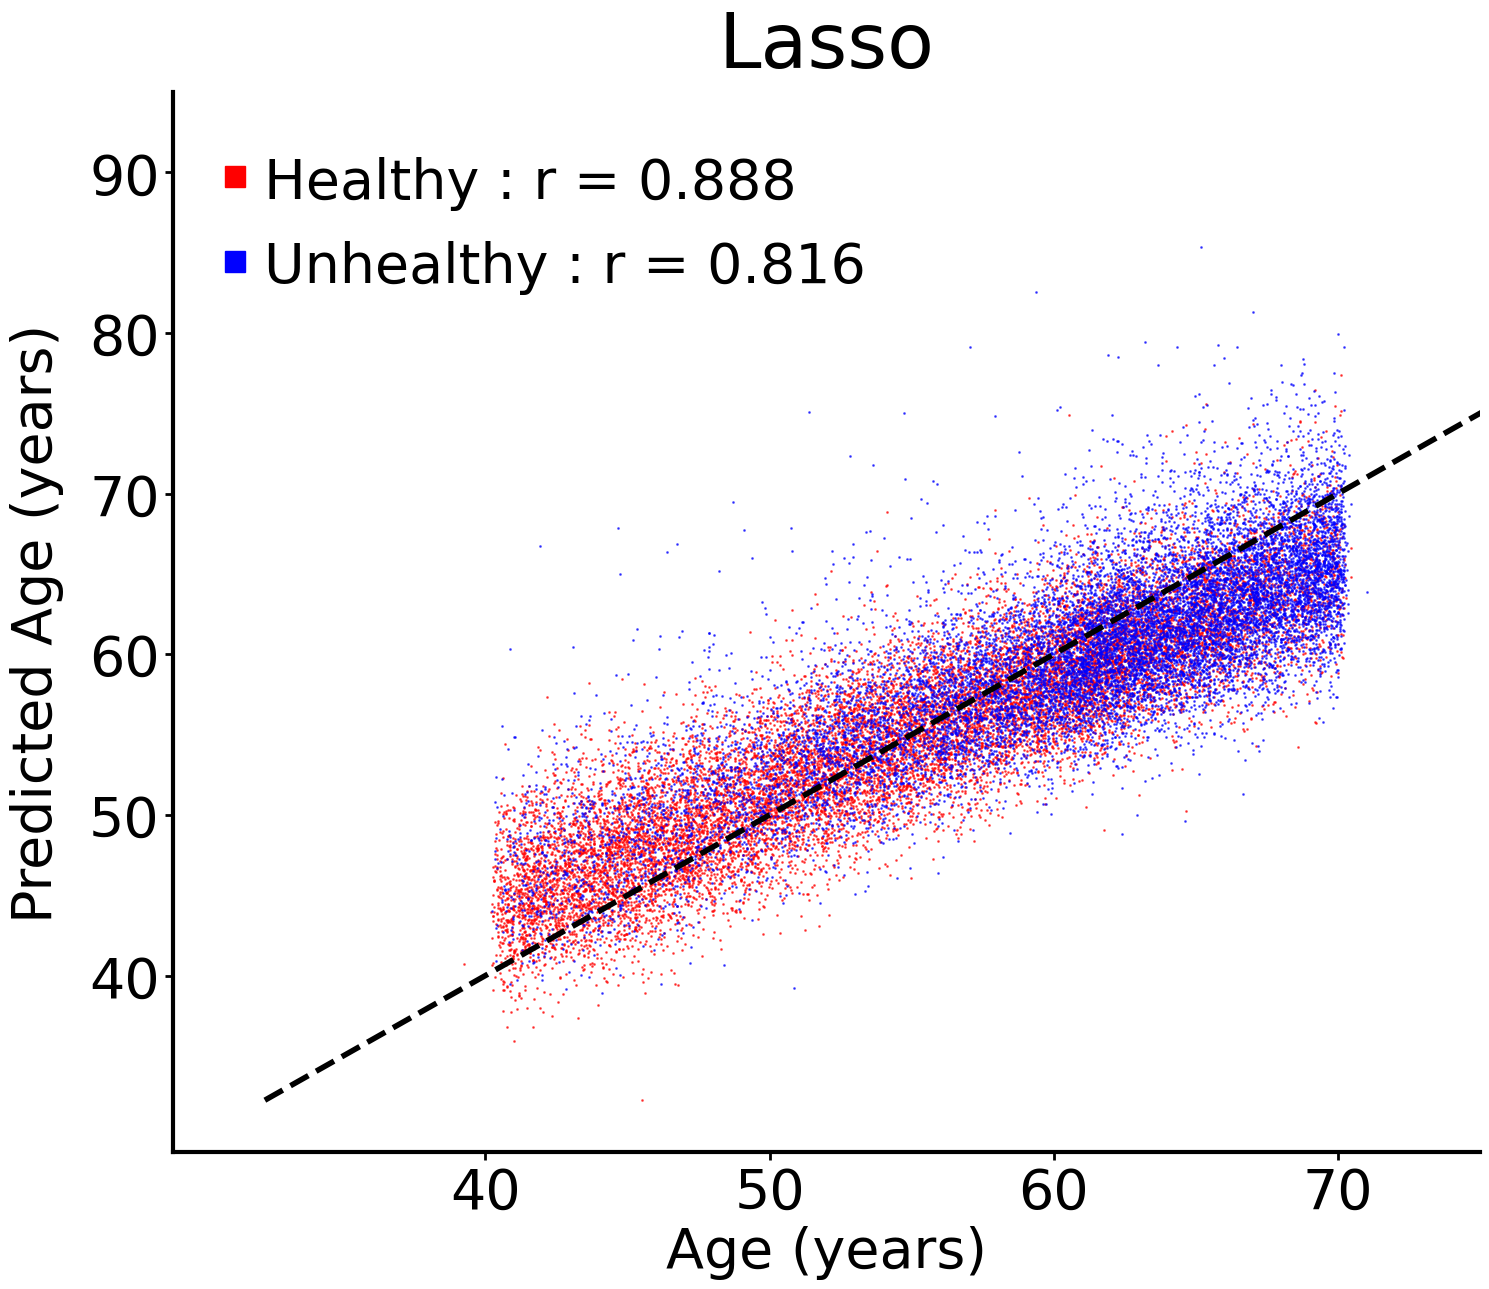

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Define paths to data files for Lasso model results
merged_csv_path = '../data/Lasso/3.AR+Age+PreAge.csv'
heal_path = '../data/Lasso/1.heal_AR.csv'
unheal_path = '../data/Lasso/2.unheal_AR.csv'

# Load datasets containing actual and predicted ages
df_all = pd.read_csv(merged_csv_path)
heal_df = pd.read_csv(heal_path)
unheal_df = pd.read_csv(unheal_path)

# Create sets of participant IDs for each health status group
heal_eids = set(heal_df['eid'])
unheal_eids = set(unheal_df['eid'])

# Add health status classification column to main dataframe
df_all['group'] = df_all['eid'].apply(lambda x: 'heal' if x in heal_eids else 'unheal')

# Extract age columns for plotting
actual_age = df_all['Age']
predicted_age = df_all['PreAge']

# Create large figure for high-resolution visualization
fig, ax = plt.subplots(figsize=(15, 13))


# Plot points with different colors for healthy vs unhealthy groups
for group, color, label in [('heal', 'red', 'Healthy'), ('unheal', 'blue', 'Unhealthy')]:
    subset = df_all[df_all['group'] == group]
    ax.scatter(subset['Age'], subset['PreAge'], 
               c=color,
               alpha=0.6,
               s=1,
               label=label)

# Add diagonal reference line representing perfect age prediction
min_age = min(actual_age.min(), predicted_age.min())
max_age = max(actual_age.max(), predicted_age.max())
ax.plot([min_age, max_age], [min_age, max_age], 'k--',
        linewidth=4)

# Set axis limits and ticks for consistent visualization
ax.set_xlim(29, 75)
ax.set_xticks(np.arange(40, 71, 10))
ax.set_ylim(29, 95)
ax.set_yticks(np.arange(40, 91, 10))

# Add main title and axis labels with large fonts for readability
ax.set_title('Lasso', fontsize=55, pad=18)
ax.set_xlabel('Age (years)', fontsize=40)
ax.set_ylabel('Predicted Age (years)',
              fontsize=40, labelpad=18)

# Create custom legend with colored rectangles and correlation values
legend_x = 0.05
legend_y = 0.94
line_spacing = 0.08

# Healthy group legend item (red)
ax.add_patch(Rectangle((legend_x - 0.01, legend_y - 0.03), 0.015, 0.02,
             transform=ax.transAxes, color='red', clip_on=False))
ax.text(legend_x + 0.02, legend_y, "Healthy : r = 0.888",
        transform=ax.transAxes, fontsize=40,
        verticalalignment='top', horizontalalignment='left')

# Unhealthy group legend item (blue)
ax.add_patch(Rectangle((legend_x - 0.01, legend_y - 0.03 - line_spacing), 0.015, 0.02,
             transform=ax.transAxes, color='blue', clip_on=False))
ax.text(legend_x + 0.02, legend_y - line_spacing, "Unhealthy : r = 0.816",
        transform=ax.transAxes, fontsize=40,
        verticalalignment='top', horizontalalignment='left')

# Remove top and right spines for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize remaining borders
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

# Customize tick marks
ax.tick_params(axis='x', width=2, length=6, labelsize=40)
ax.tick_params(axis='y', width=2, length=6, labelsize=40)

# Final layout adjustment and display
plt.tight_layout()
plt.show()

# 3.EN

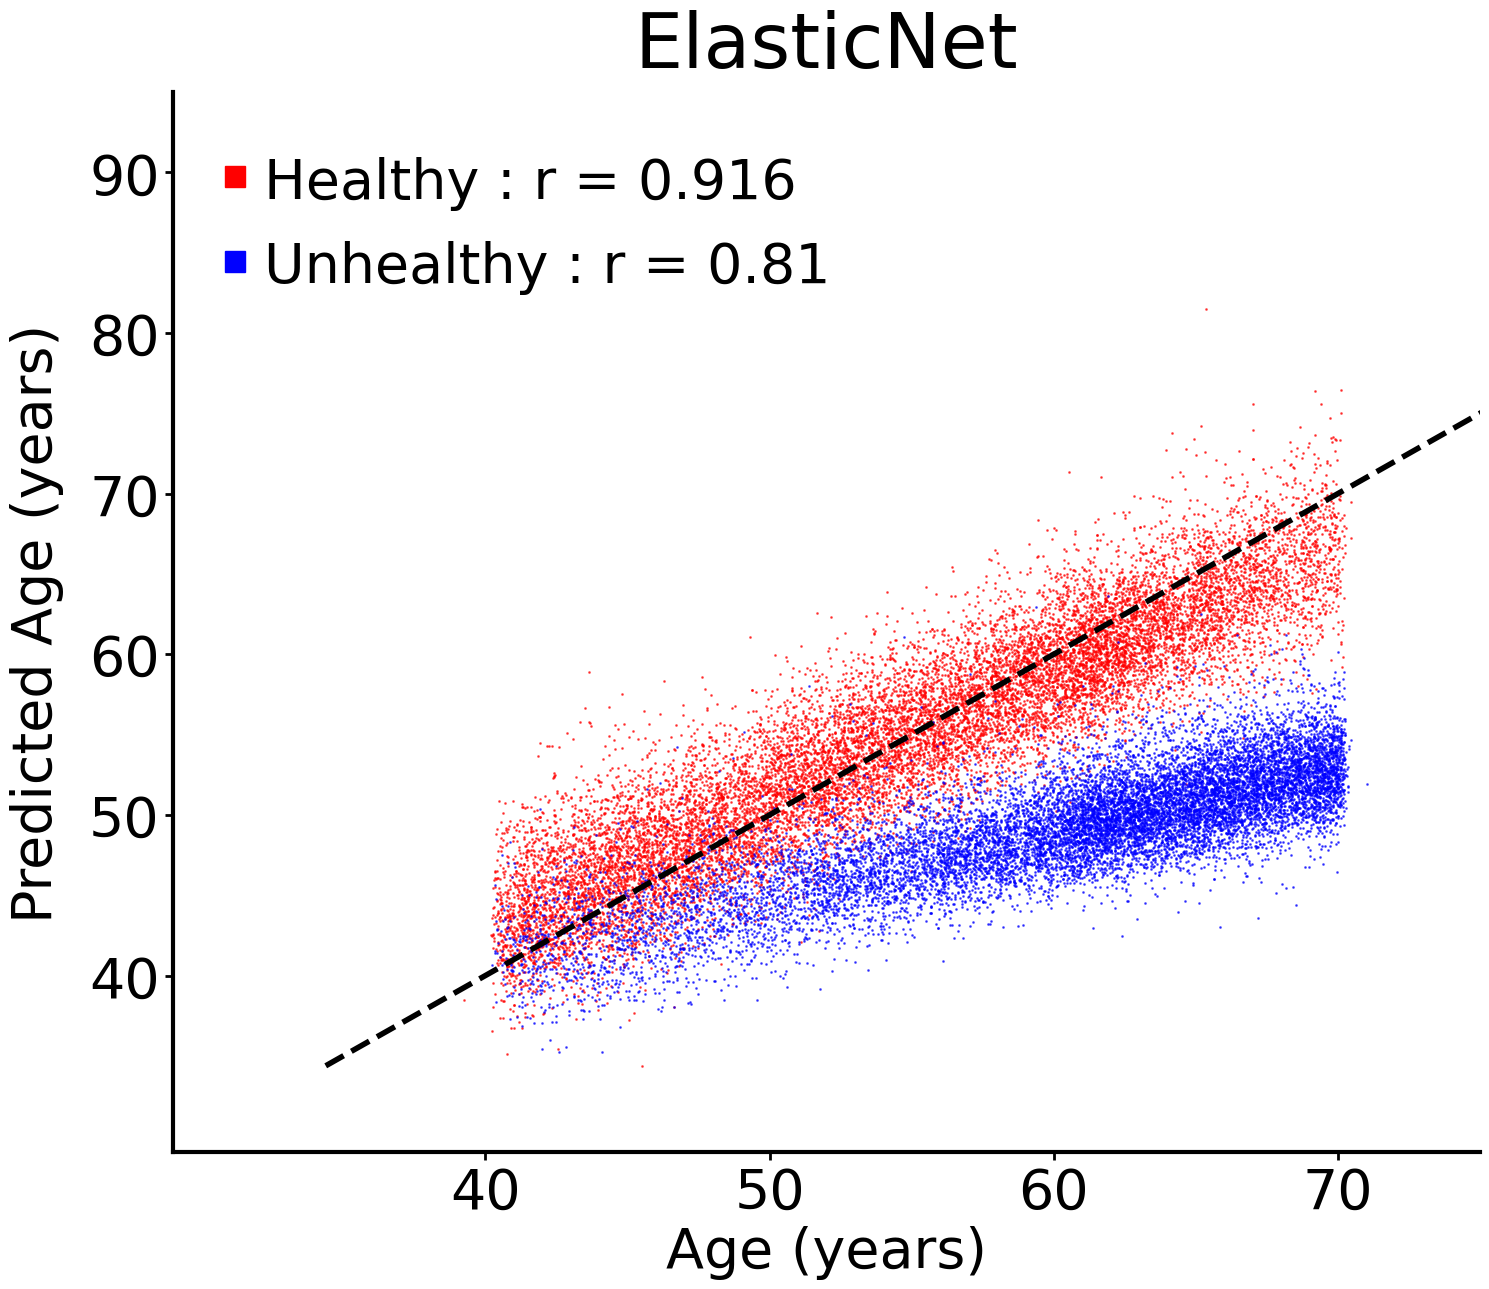

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Define paths to data files containing ElasticNet model results
merged_csv_path = '../data/ElasticNet/3.AR+Age+PreAge.csv'
heal_path = '../data/ElasticNet/1.heal_AR.csv'
unheal_path = '../data/ElasticNet/2.unheal_AR.csv'

# Load datasets containing actual and predicted ages from ElasticNet model
df_all = pd.read_csv(merged_csv_path)
heal_df = pd.read_csv(heal_path)
unheal_df = pd.read_csv(unheal_path)

# Create sets of participant IDs for each health status group
heal_eids = set(heal_df['eid'])
unheal_eids = set(unheal_df['eid'])

# Add health status classification column to main dataframe
df_all['group'] = df_all['eid'].apply(lambda x: 'heal' if x in heal_eids else 'unheal')

# Extract age columns for plotting
actual_age = df_all['Age']
predicted_age = df_all['PreAge']

# Create large figure for high-resolution visualization
fig, ax = plt.subplots(figsize=(15, 13))

# Plot points with different colors for healthy vs unhealthy groups
for group, color, label in [('heal', 'red', 'Healthy'), ('unheal', 'blue', 'Unhealthy')]:
    subset = df_all[df_all['group'] == group]
    ax.scatter(subset['Age'], subset['PreAge'], 
               c=color,
               alpha=0.6,
               s=1,
               label=label)

# Add diagonal reference line representing perfect age prediction
min_age = min(actual_age.min(), predicted_age.min())
max_age = max(actual_age.max(), predicted_age.max())
ax.plot([min_age, max_age], [min_age, max_age], 
        'k--',
        linewidth=4)

# Set axis limits and ticks for consistent visualization
ax.set_xlim(29, 75)
ax.set_xticks(np.arange(40, 71, 10))
ax.set_ylim(29, 95)
ax.set_yticks(np.arange(40, 91, 10))

# Add main title and axis labels with large fonts for readability
ax.set_title('ElasticNet',
             fontsize=55,
             pad=18)
ax.set_xlabel('Age (years)',
              fontsize=40)
ax.set_ylabel('Predicted Age (years)',
              fontsize=40,
              labelpad=18)


# Create custom legend with colored rectangles and correlation values
legend_x = 0.05
legend_y = 0.94
line_spacing = 0.08

# Healthy group legend item (red)
ax.add_patch(Rectangle((legend_x - 0.01, legend_y - 0.03), 0.015, 0.02,
             transform=ax.transAxes, 
             color='red',
             clip_on=False))
ax.text(legend_x + 0.02, legend_y, "Healthy : r = 0.916",
        transform=ax.transAxes, 
        fontsize=40,
        verticalalignment='top', 
        horizontalalignment='left')

# Unhealthy group legend item (blue)
ax.add_patch(Rectangle((legend_x - 0.01, legend_y - 0.03 - line_spacing), 0.015, 0.02,
             transform=ax.transAxes,
             color='blue',
             clip_on=False))
ax.text(legend_x + 0.02, legend_y - line_spacing, "Unhealthy : r = 0.81",
        transform=ax.transAxes,
        fontsize=40,
        verticalalignment='top', 
        horizontalalignment='left')

# Remove top and right spines for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize remaining borders
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

# Customize tick marks
ax.tick_params(axis='x', width=2, length=6, labelsize=40)
ax.tick_params(axis='y', width=2, length=6, labelsize=40)

# Final layout adjustment and display
plt.tight_layout()
plt.show()

# 4.MLP

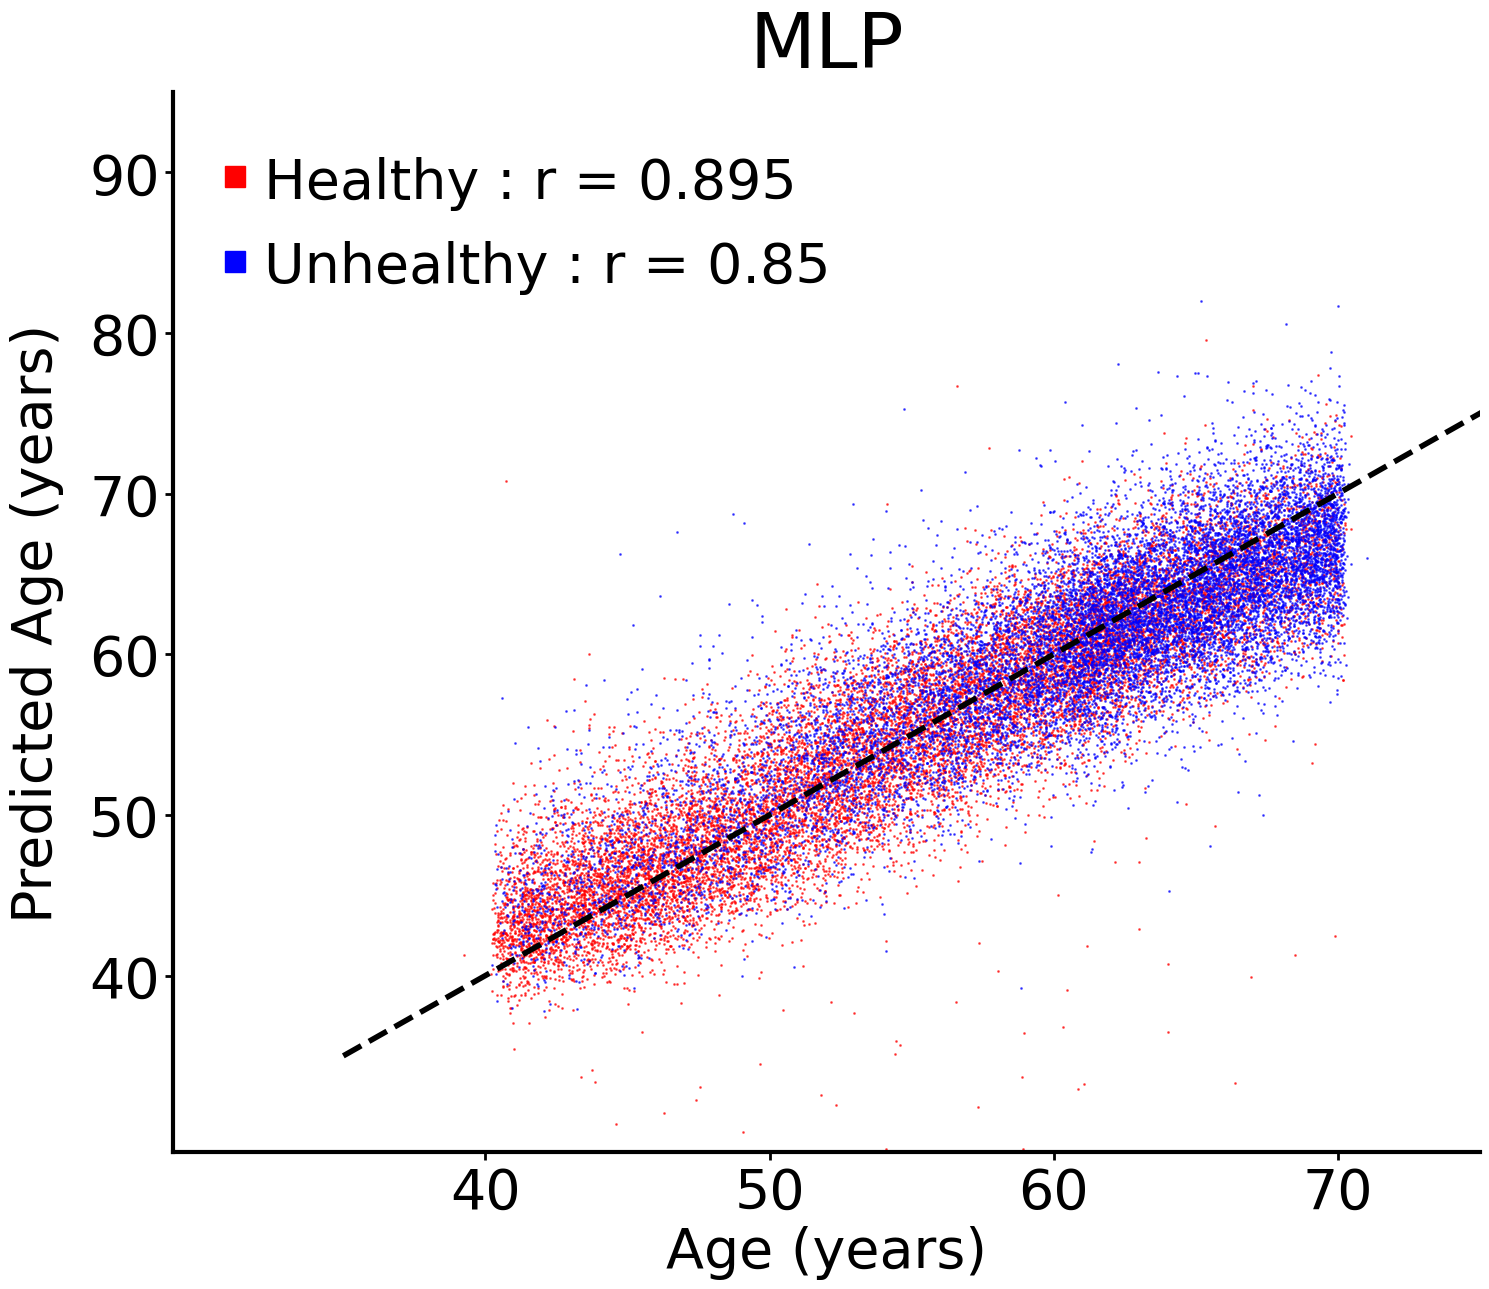

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Define paths to data files containing MLP (Multi-Layer Perceptron) model results
merged_csv_path = '../data/MLP/3.AR+Age+PreAge.csv'
heal_path = '../data/MLP/1.heal_AR.csv'
unheal_path = '../data/MLP/2.unheal_AR.csv'

# Load datasets containing actual and predicted ages from MLP model
df_all = pd.read_csv(merged_csv_path)
heal_df = pd.read_csv(heal_path)
unheal_df = pd.read_csv(unheal_path)

# Create sets of participant IDs for each health status group
heal_eids = set(heal_df['eid'])
unheal_eids = set(unheal_df['eid'])

# Add health status classification column to main dataframe
df_all['group'] = df_all['eid'].apply(lambda x: 'heal' if x in heal_eids else 'unheal')

# Extract age columns for plotting
actual_age = df_all['Age']
predicted_age = df_all['PreAge']

# Create large figure (15x13 inches) for high-resolution visualization
fig, ax = plt.subplots(figsize=(15, 13))

# Plot points with different colors for healthy vs unhealthy groups
for group, color, label in [('heal', 'red', 'Healthy'), ('unheal', 'blue', 'Unhealthy')]:
    subset = df_all[df_all['group'] == group]
    ax.scatter(subset['Age'], subset['PreAge'], 
               c=color,
               alpha=0.6,
               s=1,
               label=label)

# Add diagonal reference line representing perfect age prediction
max_age = max(actual_age.max(), predicted_age.max())
ax.plot([35, max_age], [35, max_age], 
        'k--',
        linewidth=4)

# Set axis limits and ticks for consistent visualization
ax.set_xlim(29, 75)
ax.set_xticks(np.arange(40, 71, 10))
ax.set_ylim(29, 95)
ax.set_yticks(np.arange(40, 91, 10))

# Add main title and axis labels with large fonts for readability
ax.set_title('MLP',
             fontsize=55,
             pad=18)
ax.set_xlabel('Age (years)',
              fontsize=40)
ax.set_ylabel('Predicted Age (years)',
              fontsize=40,
              labelpad=18)

# Create custom legend with colored rectangles and correlation values
legend_x = 0.05
legend_y = 0.94
line_spacing = 0.08

# Healthy group legend item (red)
ax.add_patch(Rectangle((legend_x - 0.01, legend_y - 0.03), 0.015, 0.02,
             transform=ax.transAxes, 
             color='red',
             clip_on=False))
ax.text(legend_x + 0.02, legend_y, "Healthy : r = 0.895",
        transform=ax.transAxes, 
        fontsize=40,
        verticalalignment='top', 
        horizontalalignment='left')

# Unhealthy group legend item (blue)
ax.add_patch(Rectangle((legend_x - 0.01, legend_y - 0.03 - line_spacing), 0.015, 0.02,
             transform=ax.transAxes,
             color='blue',
             clip_on=False))
ax.text(legend_x + 0.02, legend_y - line_spacing, "Unhealthy : r = 0.85",
        transform=ax.transAxes,
        fontsize=40,
        verticalalignment='top', 
        horizontalalignment='left')

# Remove top and right spines for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize remaining borders
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

# Customize tick marks
ax.tick_params(axis='x', width=2, length=6, labelsize=40)
ax.tick_params(axis='y', width=2, length=6, labelsize=40)

# Final layout adjustment and display
plt.tight_layout()
plt.show()

# 5.SGD

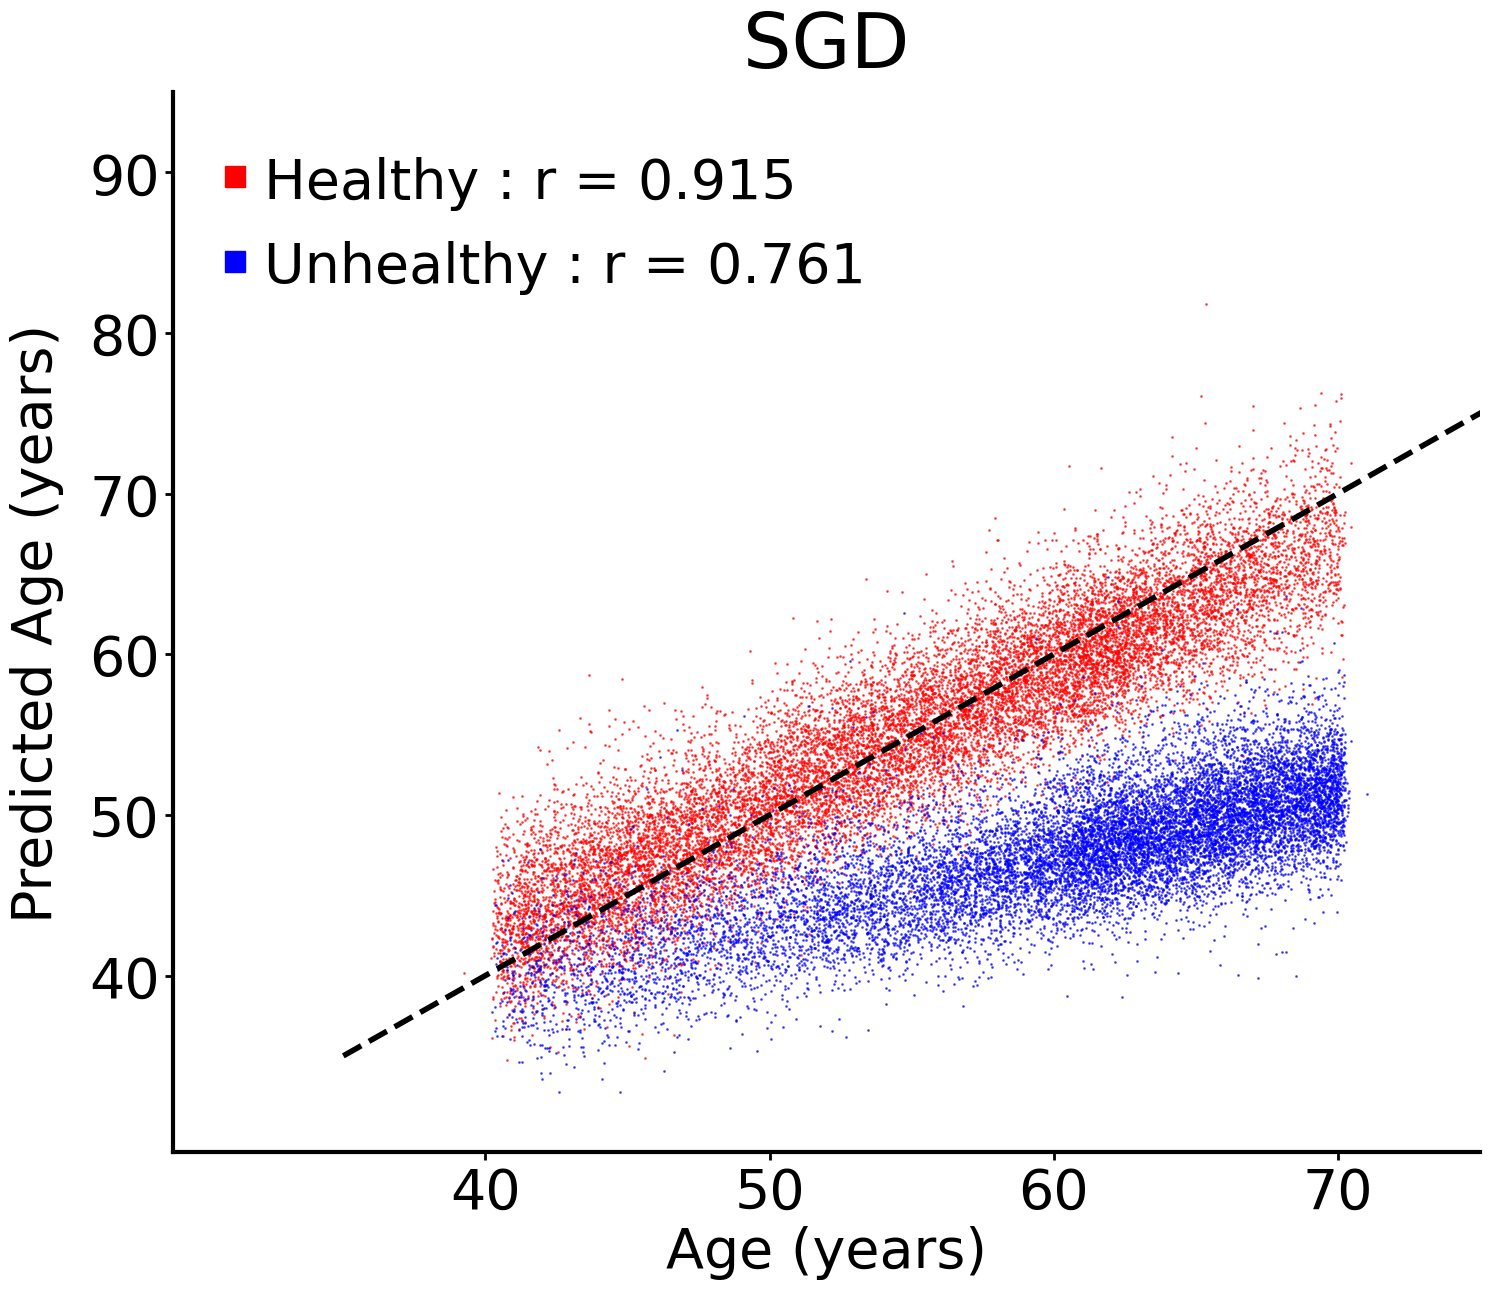

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Define paths to data files containing SGD model results
merged_csv_path = '../data/SGD/3.AR+Age+PreAge.csv'
heal_path = '../data/SGD/1.heal_AR.csv'
unheal_path = '../data/SGD/2.unheal_AR.csv'

# Load datasets containing actual and predicted ages from SGD model
df_all = pd.read_csv(merged_csv_path)
heal_df = pd.read_csv(heal_path)
unheal_df = pd.read_csv(unheal_path)

# Create sets of participant IDs for each health status group
heal_eids = set(heal_df['eid'])
unheal_eids = set(unheal_df['eid'])

# Add health status classification column to main dataframe
df_all['group'] = df_all['eid'].apply(lambda x: 'heal' if x in heal_eids else 'unheal')

# Extract age columns for plotting
actual_age = df_all['Age']
predicted_age = df_all['PreAge']

# Create large figure for high-resolution visualization
fig, ax = plt.subplots(figsize=(15, 13))

# Plot points with different colors for healthy vs unhealthy groups
for group, color, label in [('heal', 'red', 'Healthy'), ('unheal', 'blue', 'Unhealthy')]:
    subset = df_all[df_all['group'] == group]
    ax.scatter(subset['Age'], subset['PreAge'], 
               c=color,
               alpha=0.6,
               s=1,
               label=label)

# Add diagonal reference line representing perfect age prediction
max_age = max(actual_age.max(), predicted_age.max())
ax.plot([35, max_age], [35, max_age], 
        'k--',
        linewidth=4)

# Set axis limits and ticks for consistent visualization
ax.set_xlim(29, 75)
ax.set_xticks(np.arange(40, 71, 10))
ax.set_ylim(29, 95)
ax.set_yticks(np.arange(40, 91, 10))

# Add main title and axis labels with large fonts for readability
ax.set_title('SGD',
             fontsize=55,
             pad=18)
ax.set_xlabel('Age (years)',
              fontsize=40)
ax.set_ylabel('Predicted Age (years)',
              fontsize=40,
              labelpad=18)

# Create custom legend with colored rectangles and correlation values
legend_x = 0.05
legend_y = 0.94
line_spacing = 0.08

# Healthy group legend item (red)
ax.add_patch(Rectangle((legend_x - 0.01, legend_y - 0.03), 0.015, 0.02,
             transform=ax.transAxes, 
             color='red',
             clip_on=False))
ax.text(legend_x + 0.02, legend_y, "Healthy : r = 0.915",
        transform=ax.transAxes, 
        fontsize=40,
        verticalalignment='top', 
        horizontalalignment='left')

# Unhealthy group legend item (blue)
ax.add_patch(Rectangle((legend_x - 0.01, legend_y - 0.03 - line_spacing), 0.015, 0.02,
             transform=ax.transAxes,
             color='blue',
             clip_on=False))
ax.text(legend_x + 0.02, legend_y - line_spacing, "Unhealthy : r = 0.761",
        transform=ax.transAxes,
        fontsize=40,
        verticalalignment='top', 
        horizontalalignment='left')

# Remove top and right spines for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize remaining borders
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

# Customize tick marks
ax.tick_params(axis='x', width=2, length=6, labelsize=40)
ax.tick_params(axis='y', width=2, length=6, labelsize=40)

# Final layout adjustment and display
plt.tight_layout()
plt.show()

# 6.SR

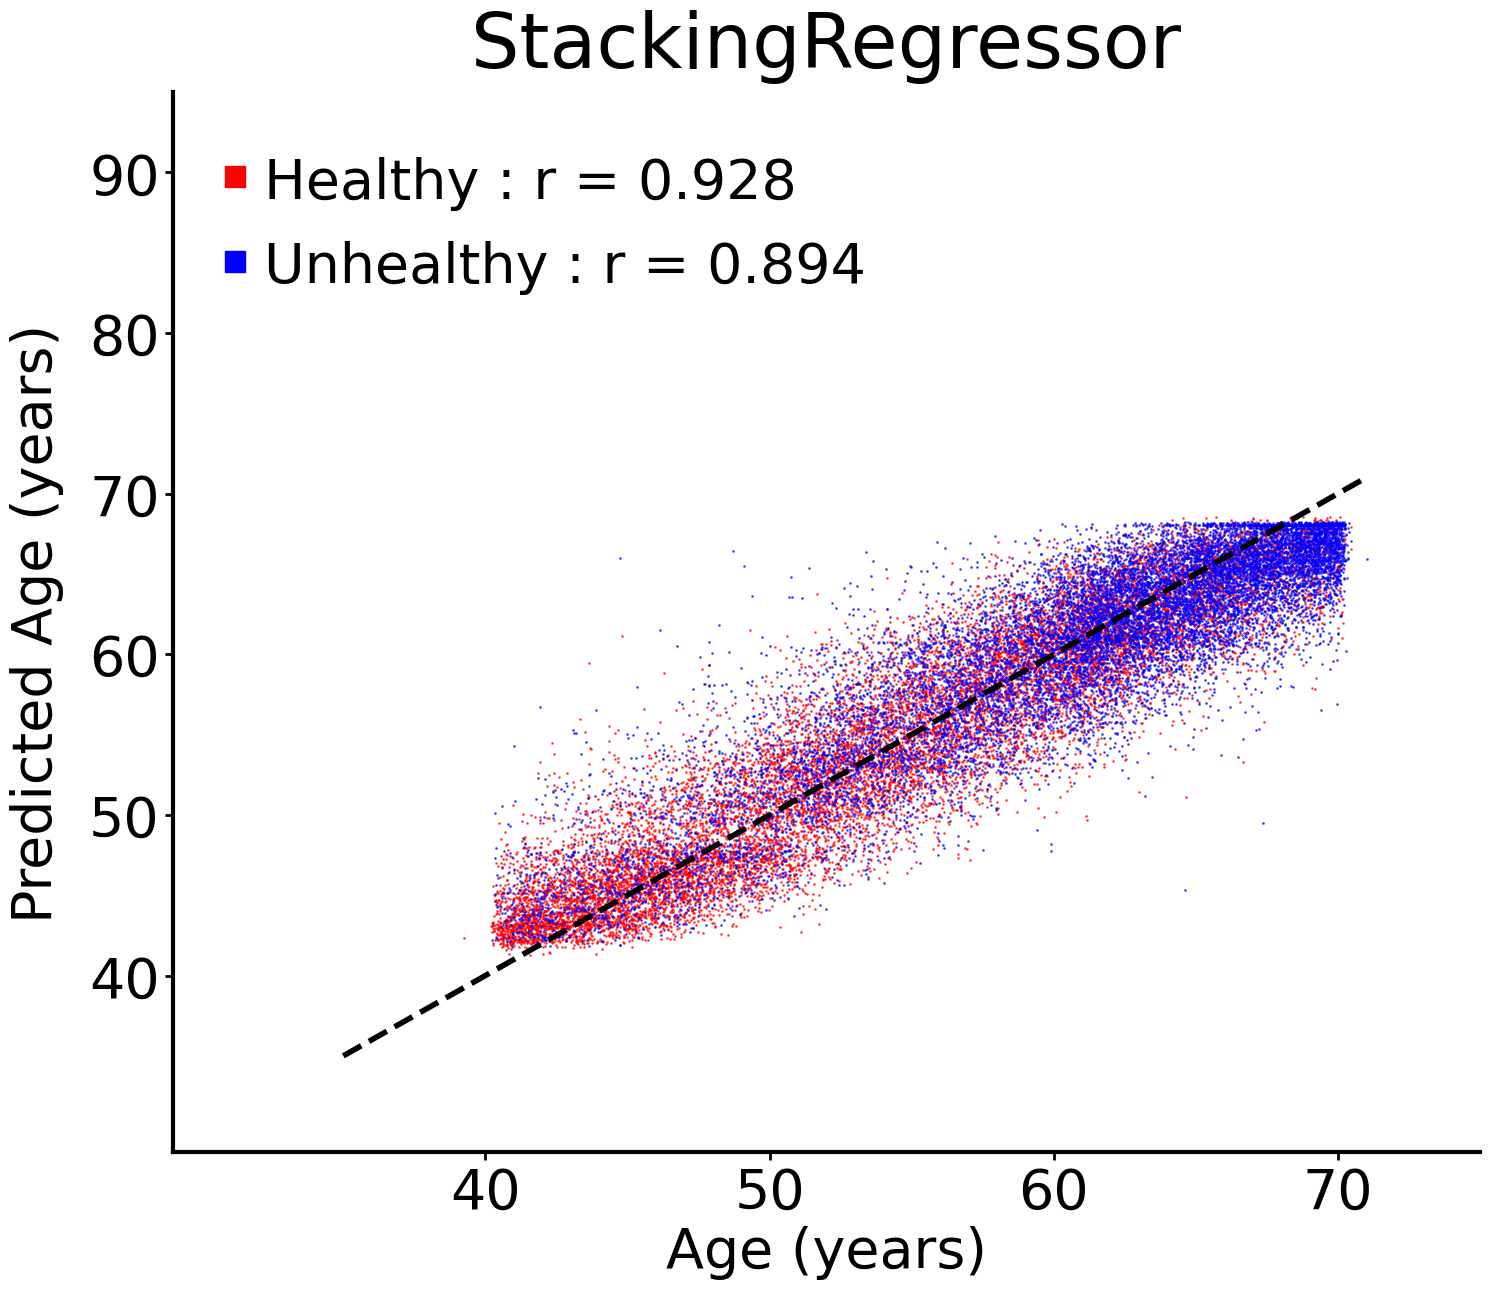

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Define paths to data files containing StackingRegressor model results
merged_csv_path = '../data/SR/3.AR+Age+PreAge.csv'
heal_path = '../data/SR/1.heal_AR.csv'
unheal_path = '../data/SR/2.unheal_AR.csv'

# Load datasets containing actual and predicted ages from StackingRegressor model
df_all = pd.read_csv(merged_csv_path)
heal_df = pd.read_csv(heal_path)
unheal_df = pd.read_csv(unheal_path)

# Create sets of participant IDs for each health status group
heal_eids = set(heal_df['eid'])
unheal_eids = set(unheal_df['eid'])

# Add health status classification column to main dataframe
df_all['group'] = df_all['eid'].apply(lambda x: 'heal' if x in heal_eids else 'unheal')

# Extract age columns for plotting
actual_age = df_all['Age']
predicted_age = df_all['PreAge']

# Create large figure for high-resolution visualization
fig, ax = plt.subplots(figsize=(15, 13))

# Plot points with different colors for healthy vs unhealthy groups
for group, color, label in [('heal', 'red', 'Healthy'), ('unheal', 'blue', 'Unhealthy')]:
    subset = df_all[df_all['group'] == group]
    ax.scatter(subset['Age'], subset['PreAge'], 
               c=color,
               alpha=0.6,
               s=1,
               label=label)

# Add diagonal reference line representing perfect age prediction
max_age = max(actual_age.max(), predicted_age.max())
ax.plot([35, max_age], [35, max_age], 
        'k--',
        linewidth=4)

# Set axis limits and ticks for consistent visualization
ax.set_xlim(29, 75)
ax.set_xticks(np.arange(40, 71, 10))
ax.set_ylim(29, 95)
ax.set_yticks(np.arange(40, 91, 10))

# Add main title and axis labels with large fonts for readability
ax.set_title('StackingRegressor',
             fontsize=55,
             pad=18)
ax.set_xlabel('Age (years)',
              fontsize=40)
ax.set_ylabel('Predicted Age (years)',
              fontsize=40,
              labelpad=18)

# Create custom legend with colored rectangles and correlation values
legend_x = 0.05
legend_y = 0.94
line_spacing = 0.08

# Healthy group legend item (red)
ax.add_patch(Rectangle((legend_x - 0.01, legend_y - 0.03), 0.015, 0.02,
             transform=ax.transAxes, 
             color='red',
             clip_on=False))
ax.text(legend_x + 0.02, legend_y, "Healthy : r = 0.928",
        transform=ax.transAxes, 
        fontsize=40,
        verticalalignment='top', 
        horizontalalignment='left')

# Unhealthy group legend item (blue)
ax.add_patch(Rectangle((legend_x - 0.01, legend_y - 0.03 - line_spacing), 0.015, 0.02,
             transform=ax.transAxes,
             color='blue',        # Unhealthy group color
             clip_on=False))
ax.text(legend_x + 0.02, legend_y - line_spacing, "Unhealthy : r = 0.894",
        transform=ax.transAxes,
        fontsize=40,
        verticalalignment='top', 
        horizontalalignment='left')

# Remove top and right spines for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize remaining borders
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

# Customize tick marks
ax.tick_params(axis='x', width=2, length=6, labelsize=40)
ax.tick_params(axis='y', width=2, length=6, labelsize=40)

# Final layout adjustment and display
plt.tight_layout()
plt.show()